# Introduction to Regression with Neural Networks in Tensorflow

Definition: Predicting a numerical varibale based on independent variables

In [1]:
# Import tensorflow
import tensorflow as tf

## Creating data to view and fit

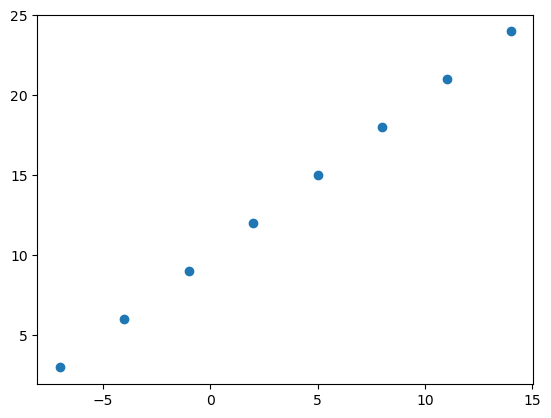

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualisation
plt.scatter(X, y)

In [3]:
#Equation expected from the above data
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [6]:
#Turn over numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

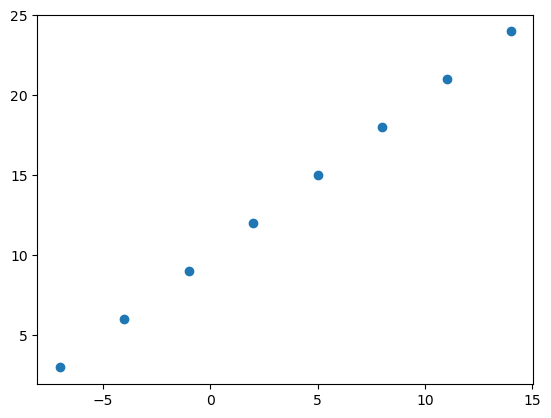

In [8]:
plt.scatter(X, y)

### Steps in modelling with Tensorflow

1. **Created a model**: define input, hidden and output layers
2. **Compile a model**: define the loss function, optimizer and the evaluation metrics
3. **Fitting a model**: train the model with the training dataset to find the pattern or relation between the independent variable and the dependent variable

In [9]:
# Set random sedd
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Alternative
""" model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1)) """

#2. Compile the model
model.compile(loss= tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 0s 110ms/step - loss: 14.5201 - mae: 14.5201
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 14.3876 - mae: 14.3876
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 14.2551 - mae: 14.2551
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 14.1226 - mae: 14.1226
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 13.9901 - mae: 13.9901


2024-01-19 15:32:06.900693: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#Try and make a prediction using the model
ypred = model.predict([17.0])

ypred + 12.2284

1/1 [==============================] - 0s 37ms/step


array([[10.298632]], dtype=float32)

## Improving our model

We can imporve our model by altering the steps we took to create a model.

1. **Creating a model**: we might:
    1. add more **layers** 
    2. increase the **number of hidden units** within each of the hidden layers
    3. change the **activation function** of each layer.

2. **Compiling a model**: we might: 
    1. change the **optimization function** 
    2. perhaps the **learning rate** of the optimization function
3. **Fitting a model**: we might fit a model for:
    1. more **epochs** 
    2. more **data**


In [12]:
#Rebuild the model

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

#3. Fit the model
model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 89ms/step - loss: 10.1346 - mae: 10.1346
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0021 - mae: 10.0021
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8695 - mae: 9.8695
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7371 - mae: 9.7371
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6046 - mae: 9.6046
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4721 - mae: 9.4721
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.3396 - mae: 9.3396
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2071 - mae: 9.2071
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0746 - mae: 9.0746
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9421 - mae: 8.9421
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8.

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
#Try predicting from model

model.predict([17.0])

1/1 [==============================] - 0s 27ms/step


array([[30.241459]], dtype=float32)

In [15]:
#1. Create Sequenial model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01))

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 106ms/step - loss: 9.0177
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0132
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 9.0087
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.0042
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9997
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9952
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9907
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 8.9862
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 8.9817
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 8.9772
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 8.9727
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 8.9682
Epoch 13/100
1/1 [==============================] - 0s 2ms/

In [16]:
#Predicting
model.predict([17.0])

1/1 [==============================] - 0s 26ms/step


array([[23.571222]], dtype=float32)

In [17]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 115ms/step - loss: 13.1615 - mae: 13.1615
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5116 - mae: 12.5116
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8589 - mae: 11.8589
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.1972 - mae: 11.1972
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5264 - mae: 10.5264
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8399 - mae: 9.8399
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1533 - mae: 9.1533
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.4712 - mae: 8.4712
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.7495 - mae: 7.7495
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9811 - mae: 6.9811
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - l

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 30ms/step


array([[32.321712]], dtype=float32)

**Note**: In the above case, although the loss value is less but the prediction is way farther than the previous one which was much nearer to the actual value. Hence, this is a clear case of overfitting

In [19]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 114ms/step - loss: 14.1081 - mae: 14.1081
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3124 - mae: 13.3124
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5178 - mae: 12.5178
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7331 - mae: 11.7331
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9432 - mae: 10.9432
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1357 - mae: 10.1357
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.3009 - mae: 9.3009
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 8.4232 - mae: 8.4232
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5174 - mae: 7.5174
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.5797 - mae: 6.5797
Epoch 11/100
1/1 [==============================] - 0s 2ms/step -

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 31ms/step


array([[31.426245]], dtype=float32)

In [27]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 112ms/step - loss: 13.9400 - mae: 13.9400
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4406 - mae: 13.4406
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9422 - mae: 12.9422
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4422 - mae: 12.4422
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.9381 - mae: 11.9381
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4273 - mae: 11.4273
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9071 - mae: 10.9071
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3747 - mae: 10.3747
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8276 - mae: 9.8276
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.2629 - mae: 9.2629
Epoch 11/100
1/1 [==============================] - 0s 2ms/st

In [28]:
model.predict([17.0])

1/1 [==============================] - 0s 35ms/step


array([[29.264748]], dtype=float32)

In [23]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 153ms/step - loss: 15.0377 - mae: 15.0377
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.9613 - mae: 14.9613
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.8992 - mae: 14.8992
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 14.8374 - mae: 14.8374
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7757 - mae: 14.7757
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7140 - mae: 14.7140
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 14.6523 - mae: 14.6523
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 14.5906 - mae: 14.5906
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 14.5290 - mae: 14.5290
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 14.4673 - mae: 14.4673
Epoch 11/100
1/1 [==============================] - 0s 2m

In [24]:
model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


array([[22.42154]], dtype=float32)

In [25]:
#Another Change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= None),
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01),
              metrics= ['mae'])

model.fit(tf.expand_dims(X, axis= -1), y, epochs= 100)

Epoch 1/100
1/1 [==============================] - 0s 154ms/step - loss: 14.3644 - mae: 14.3644
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.2899 - mae: 14.2899
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.2154 - mae: 14.2154
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 14.1409 - mae: 14.1409
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0664 - mae: 14.0664
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9920 - mae: 13.9920
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.9176 - mae: 13.9176
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8431 - mae: 13.8431
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7687 - mae: 13.7687
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 13.6943 - mae: 13.6943
Epoch 11/100
1/1 [==============================] - 0s 2m

In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 32ms/step


array([[29.987217]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> and repeat
```

3 thigs to remember when we evaluate:
> "Visualise, Visualise and Visualise"

Things to visualise:
1. The data
2. The model itself
3. The training of a model
4. The prediction of the model

In [29]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [30]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

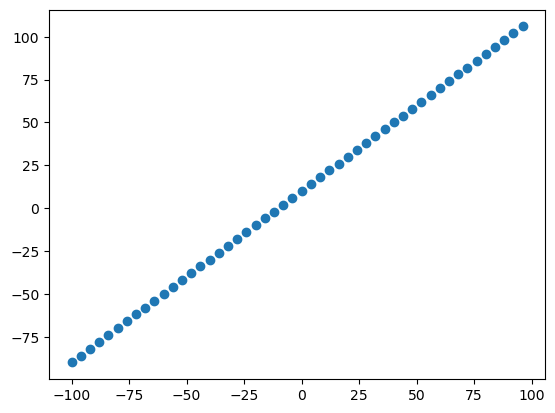

In [31]:
#Visualise the data
plt.scatter(X, y)

### Three sets of the data for the model

1. Training dataset
2. Validating dataset
3. Testing dataset

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size= 0.20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [37]:
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,   32,  -96,  -20,   84,   96,  -92,   92,   -4,  -40,   72,
          48,   60,  -44,   52,   20,  -32,  -56,   24,   16,  -24,  -64,
         -88,  -48,   68,  -84,   36,   56,   80,   28,  -76,  -60,   40,
         -36,  -72,   44,  -28,  -12,    4,    0], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([-16, -52,  -8, -80,   8,  12,  76,  88, -68,  64], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90,  42, -86, -10,  94, 106, -82, 102,   6, -30,  82,  58,  70,
        -34,  62,  30, -22, -46,  34,  26, -14, -54, -78, -38,  78, -74,
         46,  66,  90,  38, -66, -50,  50, -26, -62,  54, -18,  -2,  14,
         10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ -6, -42,   2, -70,  18,  22,  86,  98, -58,  74], dtype=int32)>)

### Visualising the data

Now we have got out data in training and test sets ... Let's Visualise it

[]

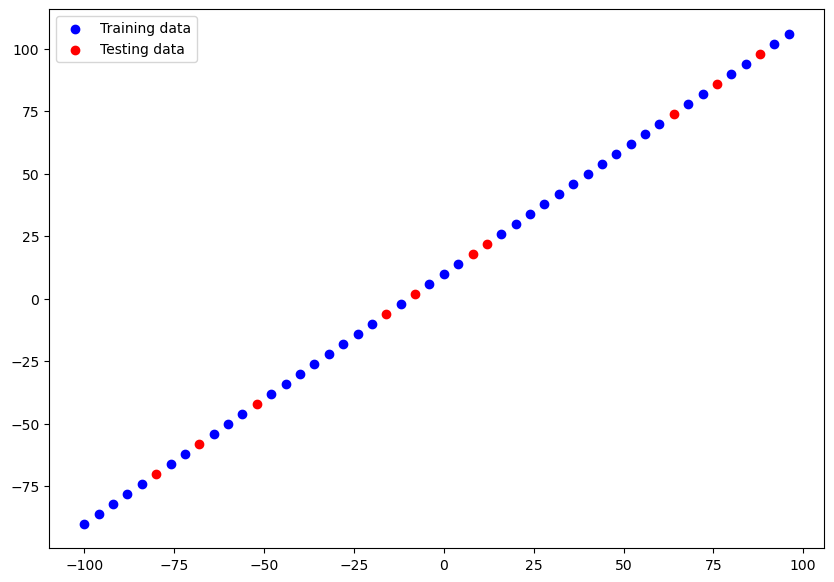

In [39]:
plt.figure(figsize= (10, 7))

plt.scatter(X_train, y_train, c= 'blue', label= 'Training data')
plt.scatter(X_test, y_test, c= 'red', label= 'Testing data')

plt.legend()

plt.plot()

In [40]:
# Let's build a model using the training and evaluate using the testing data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD())

# model.fit(X_train, y_train, epochs= 100)

In [41]:
#Visualising the model

model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [46]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape= [1])
])

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD())


In [47]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. Total Params: total number of parameters in the model
2. Trainable parameters: parameters that can be updated while on training
3. Non-trainable params: parameters that are not updated while training, particularly seen in **transfer learning models**

**Excercies**: Try playing around with the number of hidden units in the dense layer, see how that effect the number of parameters

In [48]:
#Let's fit the model to the training data
model.fit(X_train, y_train, epochs= 100, verbose= 1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 34.7264
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 11.7421
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 9.9969
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 9.6729
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2631
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2138
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2533
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 10.3160
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 9.9365
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 9.6175
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - loss: 14.2952
Epoch 12/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8668
Epoch 13/100
2/2 [==============================] - 0s